# Decision Trees

### What is a Decision Tree?

A Decision Tree is a flowchart-like tree structure where each internal node represents a feature(or attribute), each branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes multiple possible outcomes of a situation and predicts the best possible move.

### How Does It Work?

The idea behind a decision tree is to divide the dataset into subsets based on different conditions until we make the data as pure as possible in terms of the target variable. Purity here refers to how mixed the classes in the subsets are. The decision tree aims to achieve subsets where the target variable has a single class. 

### Anatomy of a Decision Tree

1. **Root Node**: It represents the entire sample and this further gets divided into two or more homogeneous sets.
2. **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.
3. **Leaf/ Terminal Node**: Nodes that do not split are called Leaf or Terminal nodes.

### Types of Decision Trees

1. **Categorical Variable Decision Trees**: Decision Trees which have categorical target variables then it is called a Categorical variable decision tree.
2. **Continuous Variable Decision Trees**: Decision Trees have a continuous target variable then it is called Continuous Variable Decision Trees.

### Impurity Measures

The decision to split at each node is determined by impurity measures like Gini impurity, Information Gain, Gain Ratio, or Chi-Square.

1. **Gini Impurity**: Measures the frequency at which any element of the dataset will be mislabeled.
2. **Information Gain**: Measures the effectiveness of an attribute in reducing uncertainty.
3. **Gain Ratio**: Corrects information gain by taking the intrinsic information of a split into account.
4. **Chi-Square**: It is the statistical measure used to determine the statistical significance of the observed distribution of the class labels.

### Advantages and Disadvantages

**Advantages**:
- Simple to understand and interpret.
- Requires less data preprocessing (no need for normalization, dummy variables, etc.)
- Handles both continuous and discrete variables.
- Performs well with large datasets.

**Disadvantages**:
- Sensitive to noisy data, leading to overfitting.
- Biased towards features with more levels.
- Can create biased trees if some classes dominate.

In this lab, we will use the Titanic dataset to demonstrate how to use decision trees for classification. Along the way, we will also explore techniques for resampling and imputing missing data.

## An example

Suppose our goal is to predict whether or not someone will cheat on taxes.

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |

We can easily build a decision tree by stepping through features one by one, splitting on any "impure" features.

![Decision Tree Example](assets/dtree_example.png)

However, we could also build a decision tree like this:

![Decision Tree Example](assets/dtree2_example.png)

Which one is better?  How do we choose between them?

---

# Exercise

The **Titanic dataset** is widely used in ML for teaching purposes.  It contains a list of all of the passengers, and provides an indicator of whether each passenger survived.  Note that some features may or may not be meaningful.

The following columns are available in the original dataset:

1. **PassengerId**: An unique identifier for each passenger.
2. **Survived**: Whether the passenger survived or not. 1 for survived, 0 for deceased.
3. **Pclass**: The ticket class, indicating the socio-economic status of the passenger (1st = Upper, 2nd = Middle, 3rd = Lower).
4. **Name**: The full name of the passenger, sometimes including titles.
5. **Sex**: Gender of the passenger, usually 'male' or 'female'.
6. **Age**: Age of the passenger in years, although it's fractional if the age is less than one.
7. **SibSp**: The number of siblings or spouses aboard.
8. **Parch**: The number of parents or children aboard.
9. **Ticket**: The ticket number.
10. **Fare**: The amount of money paid for the ticket.
11. **Cabin**: The cabin number where the passenger stayed. This field contains many missing values.
12. **Embarked**: Port of embarkation, where C = Cherbourg, Q = Queenstown, S = Southampton.

Load the titanic data set from the `seaborn` library.  Note that some columns are redundant, or may be labeled somewhat differently than in the original.  See if you can construct a decision tree by hand.  What do are your first nodes?  How did you decide?  How accurate are you?

In [1]:
import seaborn as sns

titanic_data = sns.load_dataset('titanic')
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


---

## Choosing splits

Generally speaking, when building a decision tree we seek to identify splits that maximize "information gain" - that is, we pick splits that are maximally effective at separating our classes in order of increasing performance.

To maximize information gain, we can sort features according to their impurity - or in other words, how mixed the feature is. The Gini index or Gini coefficient is a metric that quantifies the impurity of a set. The Gini index varies between 0 and 1, where 0 expresses the purest form (all elements are of the same class) and 1 implies that the elements are randomly distributed across various classes.

Mathematically, the Gini index $Gini(t)$ for a node $t$ is defined as:

$$Gini(t) = 1 - \sum_{i=1}^{c} (p_i)^2$$

Here, $p_i$ is the proportion of the samples in the node $t$ that belong to class $i$, and $c$ is the number of distinct classes.

The following image illustrates how Gini varies over proportions of classes.

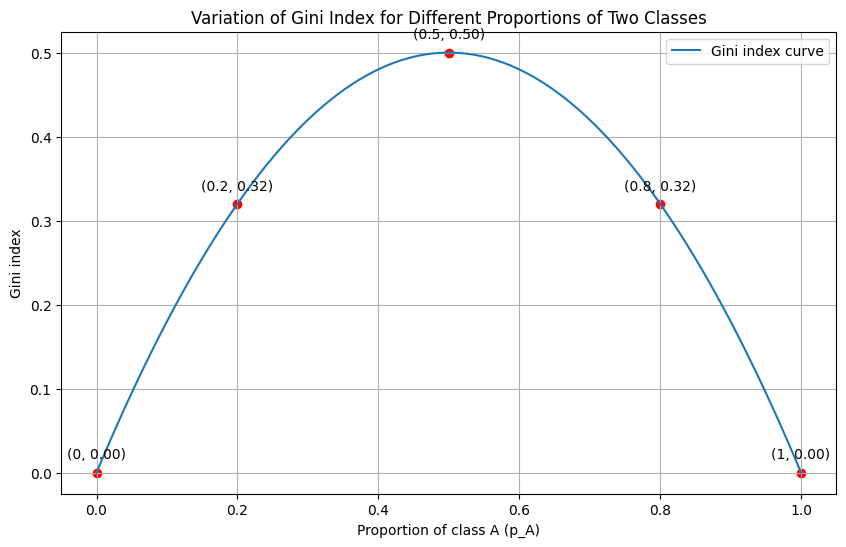

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate Gini index
def gini(p):
    return 1 - p**2 - (1 - p)**2

# Generate data points for the plot
p_values = np.linspace(0, 1, 100)
gini_values = gini(p_values)

# Highlight specific points
highlight = [0, 0.2, 0.5, 0.8, 1]
highlight_gini = gini(np.array(highlight))

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(p_values, gini_values, label='Gini index curve')
plt.scatter(highlight, highlight_gini, c='red')

# Annotate the highlighted points
for p, g in zip(highlight, highlight_gini):
    plt.annotate(f'({p}, {g:.2f})', (p, g), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Proportion of class A (p_A)')
plt.ylabel('Gini index')
plt.title('Variation of Gini Index for Different Proportions of Two Classes')
plt.legend()
plt.grid(True)
plt.show()

### How Gini is Used to Identify Split Candidates

1. **Calculate Gini for the Current Node**: Before making a split, calculate the Gini index for the samples currently within the node.

2. **Calculate Gini for Each Candidate Split**: For each candidate feature and split point, divide the dataset into two child nodes. Calculate the Gini index for each child.

3. **Calculate Weighted Sum of Child Node Gini Indices**: Take a weighted sum of the Gini indices of the child nodes. The weight for each node is the proportion of samples in that node relative to the parent node.

4. **Find the Best Split**: Choose the feature and split point that results in the smallest weighted sum of child node Gini indices.

5. **Recursion**: Continue this process for each child node (either until nodes contain samples from a single class or some stopping criteria are met).

6. **Evaluate the Tree**: After building the tree, evaluate its performance and prune it as necessary, possibly using Gini as one of the criteria for pruning as well.

The attribute and the value that minimize this weighted sum are chosen as the best criteria to split the node, thereby reducing uncertainty (impurity). By iterating this process for each node in the tree, the algorithm builds a decision tree that aims to partition the dataset into pure or nearly-pure nodes, making it easier to predict the class of new samples.

## Example, cont'd

Recall our data:

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |

### Step 1: Initialize the Decision Tree

The first step in building a decision tree is to start with the entire dataset as the root node and then look for the best feature to split the data on.

### Step 2: Calculate the Gini Impurity for the Root Node

Let's use Gini Impurity as the criterion to split nodes. Gini Impurity measures the disorder of a set of elements. It is calculated as follows for a binary classification:

In the root node, we have 7 instances with "No" and 3 instances with "Yes". Therefore, the Gini impurity for the root node would be:

$$\text{Gini}_{\text{root}} = 1 - ( (\frac{7}{10})^2 + (\frac{3}{10})^2 ) = 1 - (0.49 + 0.09) = 1 - 0.58 = 0.42$$

### Step 3: Calculate the Gini Impurity for Each Split

To identify the best split, we will calculate the Gini impurity for each potential split of each feature, then select the split that reduces impurity the most. This process is called finding the "best split."

#### Split by "Refund=Yes"

- Number of instances: 3
- Number of instances with "Cheat=Yes": 0
- Number of instances with "Cheat=No": 3

$$\text{Gini}_{\text{Refund=Yes}} = 1 - \left( \left(\frac{0}{3}\right)^2 + \left(\frac{3}{3}\right)^2 \right) = 1 - (0 + 1) = 0
$$

#### Split by "Refund=No"

- Number of instances: 7
- Number of instances with "Cheat=Yes": 3
- Number of instances with "Cheat=No": 4

$$\text{Gini}_{\text{Refund=No}} = 1 - \left( \left(\frac{3}{7}\right)^2 + \left(\frac{4}{7}\right)^2 \right) = 1 - \left( \frac{9}{49} + \frac{16}{49} \right) = 1 - \frac{25}{49} = \frac{24}{49} \approx 0.49$$

#### Average Gini for "Refund" Split

$$\text{Gini}_{\text{Refund}} = \frac{3}{10} \times 0 + \frac{7}{10} \times 0.49 = 0 + 0.343 = 0.343$$

Similarly, we can calculate the average Gini for the "MaritalStatus" and "Taxable Income" attributes, and then choose the one with the largest reduction in impurity.


---

## Exercise

What is the best first split for the sample data?  Consider only categorical features.

---

### Handling continuous features

Splitting continuous features in a decision tree involves determining the best value at which to partition the data. There are multiple strategies to find this splitting point:

1. **Sorted List Method**: 
    - Sort the continuous feature values in ascending order.
    - Use the midpoint between each pair of adjacent values as a potential split point.
    - For each potential split point, calculate the resulting Gini impurity or information gain.
    - Choose the split point that minimizes impurity or maximizes information gain.

2. **Histogram-based Method**:
    - Create a histogram with 'n' bins for the continuous feature.
    - Use the edges of the bins as potential split points.
    - Calculate the Gini impurity or information gain for each split point.
    - Choose the split point that minimizes impurity or maximizes information gain.

3. **Percentile Method**:
    - Calculate specific percentiles (e.g., 25th, 50th, 75th) for the continuous feature.
    - Use these percentile values as potential split points.
    - Calculate the Gini impurity or information gain for each split point.
    - Choose the split point that minimizes impurity or maximizes information gain.

4. **Random Splits**:
    - Randomly choose 'k' values from the feature as potential split points.
    - Calculate the Gini impurity or information gain for each of these random points.
    - Choose the split point that minimizes impurity or maximizes information gain.

The Sorted List Method is often preferred for its thoroughness, but it can be computationally intensive for very large datasets. In such cases, one of the other, quicker methods may be more appropriate.

Once you've chosen a method, you'll apply it to each continuous feature to determine the best potential split points, and then proceed as you would with categorical features: calculating the resulting impurity or information gain and choosing the split that optimizes your chosen metric.

---

## Exercise

Calculate the Gini coefficient for the first two splits in the Taxable Income column using the "sorted list" method.

---

## Overfitting and Pruning

A decision tree is nonparametric algorithm, meaning it does not require any prior assumptions regarding the type of probability distributions satisfied by the class and other attributes. Linear classification (and other) algorithms are parametric algorithms because they assume the _decision boundary_ is linear, such as a line in 2-dimensional space.  A _decision boundary_ means the border between two neighboring regions of different classes.




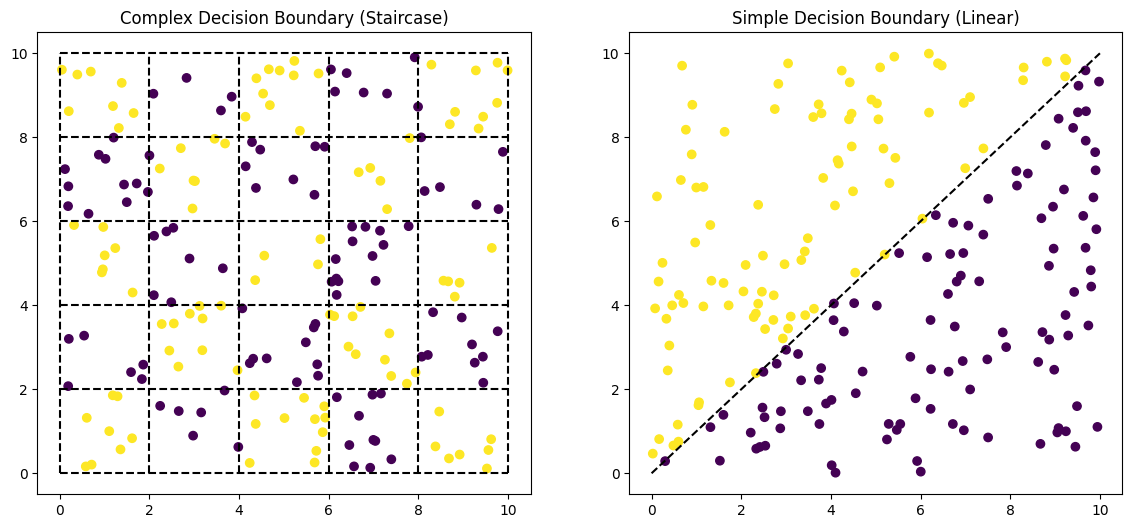

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for complex decision boundary
np.random.seed(0)
n_points = 200

x1 = np.random.uniform(0, 10, n_points)
y1 = np.random.uniform(0, 10, n_points)
labels1 = (x1 // 2) % 2 == (y1 // 2) % 2

# Generate synthetic data for simple linear decision boundary
x2 = np.random.uniform(0, 10, n_points)
y2 = np.random.uniform(0, 10, n_points)
labels2 = y2 > x2

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Complex Decision Boundary
axes[0].scatter(x1, y1, c=labels1, cmap='viridis')
axes[0].set_title('Complex Decision Boundary (Staircase)')
for i in range(0, 11, 2):
    axes[0].plot([i, i], [0, 10], 'k--')
    axes[0].plot([0, 10], [i, i], 'k--')

# Simple Linear Decision Boundary
axes[1].scatter(x2, y2, c=labels2, cmap='viridis')
axes[1].set_title('Simple Decision Boundary (Linear)')
axes[1].plot([0, 10], [0, 10], 'k--')

plt.show()


Between logistic regression and decision tree, which algorithm would you choose for either plot?

The structure of a decision tree allows for very complex decision boundaries. A deep tree with many branches can fit the training data almost perfectly.  However, because of this, it is easy to create a decision tree that can "overfit" the data.  A model that is "overfit" performs well on training data, but will likely perform poorly on unseen data. 

Note that parametric algorithms, like a linear classifier, in contrast, has some built-in guards against overfitting, because it can only separate data using a straight line (or a hyperplane in higher dimensions).

To avoid overfitting, we often "prune" a decision tree. The idea is to cut off the tree branches that are providing little power in predicting the target variable. By doing so, we can have a smaller and simpler tree that performs just as well—or even better—on new, unseen data.

### Pruning Approach

Pruning is typically done in a "bottom-up" manner, starting from the leaves of the tree. There are several strategies for pruning, but a commonly used one is "Reduced Error Pruning" and "Cost Complexity Pruning," which uses a complexity parameter $ \alpha$.

#### Reduced Error Pruning
For each node starting from the leaves, temporarily remove the subtree rooted at that node and replace it with a leaf node. The label for this new leaf node is the most common output label of the subtree it replaced. Measure the performance of the pruned tree on a validation set. If performance does not degrade, then the pruning is kept. Otherwise, the subtree remains.

#### Cost Complexity Pruning
The idea is to introduce a penalty term for complexity $\alpha$ that balances the fit of the tree against its size. The objective function we try to minimize for tree $T$ becomes:

$$\text{Cost}(T) = \text{Error}(T) + \alpha \times \text{Size}(T)$$

Here, $\text{Error}(T)$ is the misclassification error rate of the tree, and $\text{Size}(T)$ is the number of terminal nodes in the tree. The algorithm searches for the subtree $T$ that minimizes $\text{Cost}(T)$.

In practical terms, the tree is pruned by considering each node as a candidate for pruning and evaluating if replacing the subtree rooted at that node with a leaf node will decrease the cost. If so, the subtree is pruned, and this process is repeated recursively.

By adjusting $\alpha$, you control the trade-off between the tree's complexity and its fit to the training data. A higher $ \alpha$ penalizes complexity more severely, leading to more pruning, while a lower $\alpha$ allows for a more complex tree. Typically, $\alpha$ is chosen via cross-validation.

## Example with Scikit Learn

In the following, we adjust the pruning level with `ccp_alpha` to illustrate the train / test accuracy tradeoff. 

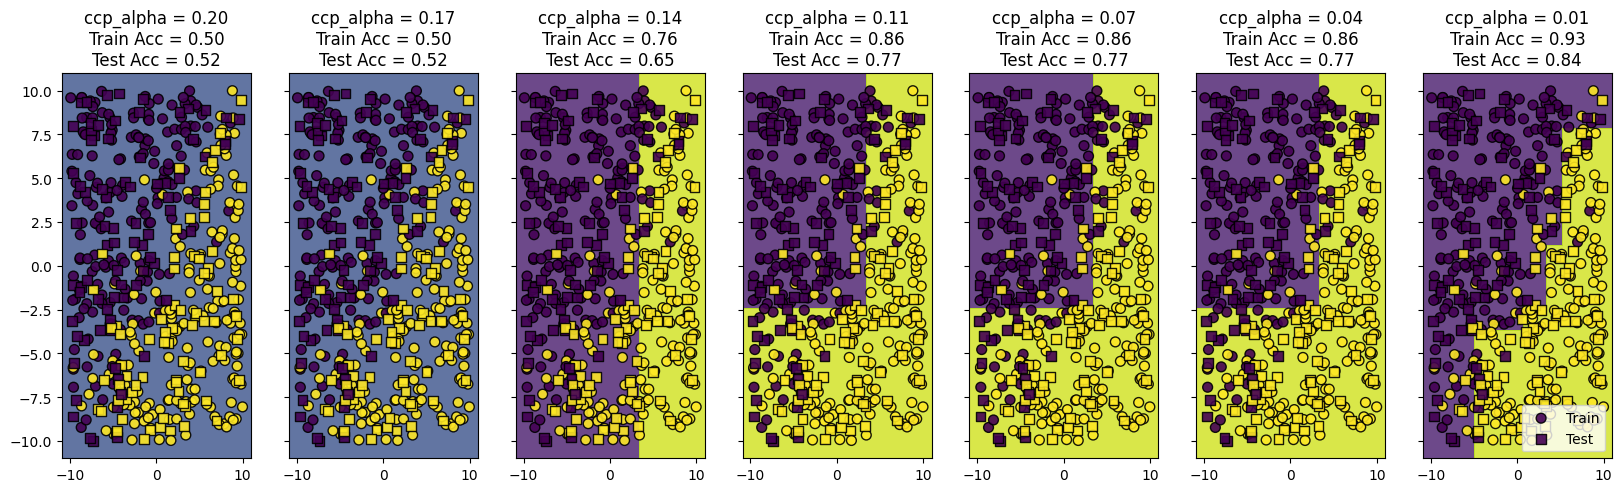

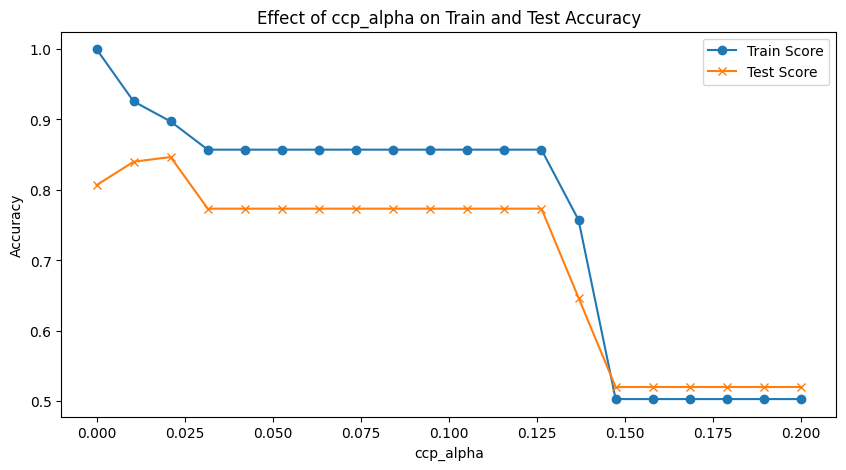

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(0)
N = 500

# Create features
X1 = np.random.uniform(-10, 10, N)
X2 = np.random.uniform(-10, 10, N)
X = np.column_stack([X1, X2])

# Create labels with noise
noise = np.random.normal(0, 4, N)  # Gaussian noise
y = np.where(X1 + noise > X2, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision trees with different ccp_alphas
ccp_alphas = np.linspace(.2, 0, 20)
train_scores = []
test_scores = []


fig, axes = plt.subplots(1, 7, figsize=(20, 5), sharex=True, sharey=True)
index = 0
for i,ccp_alpha in enumerate(ccp_alphas):
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    
    train_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test, clf.predict(X_test))
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Plot decision boundary
    if i%3 == 0:
        ax = axes[index]
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                            np.arange(y_min, y_max, 0.01))
        
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        ax.contourf(xx, yy, Z, alpha=0.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50, linewidth=1, alpha=0.9, label='Train')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', s=50, linewidth=1, alpha=0.9, label='Test')
        ax.set_title(f"ccp_alpha = {ccp_alpha:.2f}\nTrain Acc = {train_score:.2f}\nTest Acc = {test_score:.2f}")
        index+=1

plt.legend()
plt.show()

# Plot the train and test scores
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score')
plt.plot(ccp_alphas, test_scores, marker='x', label='Test Score')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of ccp_alpha on Train and Test Accuracy')
plt.show()


### A brief tutorial on using decision trees in scikit learn

Recall our sample data:

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |

#### Import Libraries and Prepare the Data

Firstly, let's import the necessary libraries and prepare our data:

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Create DataFrame from sample data
data = {'Refund': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
        'MaritalStatus': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
        'TaxableIncome': [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
        'Cheat': ['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']}

df = pd.DataFrame(data)

# Label Encoding for categorical variables - note that 
# most algorithms in SciKit Learn require some sort of encoding like this
labelencoder = LabelEncoder()
df['Refund'] = labelencoder.fit_transform(df['Refund'])
df['MaritalStatus'] = labelencoder.fit_transform(df['MaritalStatus'])
df['Cheat'] = labelencoder.fit_transform(df['Cheat'])

# Split the data
X = df[['Refund', 'MaritalStatus', 'TaxableIncome']]
y = df['Cheat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Train the Decision Tree

Here we'll use scikit-learn's `DecisionTreeClassifier`:


In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#### Model Parameters

Some of the key parameters you can set for the decision tree in scikit-learn are:

- `criterion`: The function to measure the quality of a split. Supported criteria are "gini" for Gini impurity and "entropy" for information gain.
- `splitter`: The strategy used to choose the split at each node. Options are "best" to choose the best split and "random" to choose the best random split.
- `max_depth`: The maximum depth of the tree.
- `ccp_alpha`: Complexity parameter used for Minimal Cost-Complexity Pruning.

#### Visualization and Extracting Decision Rules

You can visualize the trained decision tree using `plot_tree` method:

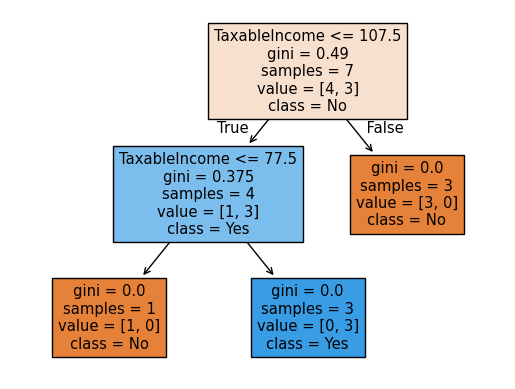

In [7]:
# Visualize the tree
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()

To extract the decision rules in a text format, you can use `export_text`:

In [ ]:
# Extract decision rules in text format
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Rules:\n", tree_rules)

That's it! You've successfully trained, visualized, and extracted decision rules from a Decision Tree using scikit-learn.

---

# Exercise

The following code shows you how to compute a decision tree on the titanic dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

import seaborn as sns

# Load dataset
data = sns.load_dataset("titanic")
# Drop rows with missing values for simplicity
data.dropna(inplace=True)

# Convert categorical variables to numerical
labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
data['class'] = labelencoder.fit_transform(data['class'])
data['embark_town'] = labelencoder.fit_transform(data['embark_town'])

# Split the data
X = data[['sex', 'age', 'fare', 'class', 'embark_town']]
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()



1.  Note that we used `data.dropna` to drop any rows with NAs.  How many did we drop?  Did we need to drop this many rows? Can we get away with dropping fewer? 
2. What happens if we don't drop na's?
3.  Use 5-fold cross validation to obtain average f1 scores. 
4.  Can you optimize the algorithm by changing parameters?  What is your best solution?